# Second SDMS Assignment Solution
## Deadine: 17/05/23
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/SecondAssignment.ipynb)

- Send your assignment to my email: guglielmo.padula@studenti.units.it before the 00:00 AM of the day after the deadiline.

## Exercise 1
Let $X_{t}$ a DTMC with stochastic matrix $A= \begin{bmatrix} 0 & 1 & 0 & 0 &0  \\  \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 & 0 \\ 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 \\ 0 & 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} \\ 0 & 0 & 0 & 1 & 0 \end{bmatrix}$ with $a=3, b=2$.
- Prove that it is irreducible
- Prove with probability simulation and with eigenvalues analysis that the DTMC has only a stationary distribution howewer that there is no convergence to that probability.
- Prove that there can't be trajectory convergence and simulate some trajectories

## Exercise 2

Let $Y_{t}$ a (birth death) CTMC with rate matrix $A= \begin{bmatrix} -b & b & 0 & 0 &0  \\  a & -{a-b} & {b} & 0 & 0 \\ 0 & a & -a-b & b & 0 \\ 0 & 0 & a & -a-b & b \\ 0 & 0 & 0 & a & -a \end{bmatrix}$ with $a=3, b=2$.

Remember that if $\lambda_{i}=q_{i,i+1}$ and $\mu_{i}=q_{i,i-1}$, $i=0,...,N-1$ then the stationary distribution $\pi$ has values
$\pi_0=\frac{1}{1+\sum_{k=1}^{N}\prod_{i=1}^{k}\frac{\lambda_{i-1}}{\mu_i}}$  and 
$\pi_k=\pi_0\prod_{i=1}^k\frac{\lambda_{i-1}}{\mu_i},\quad k=1,\ldots,N-1$

- Calculate the stationary distribution of the CTMC.
- Prove with probability simulation and with eigenvalues analysis that the CTMC converges to that stationary distribution.
- Simulate some trajectories 

## Exercise 3 (optional)
What is the relation between $Y_{t}$ and $X_{t}$?

# Solution

### Exercise 1
- it is irriducible because you can go from state 0 to state N or viceversa by moving on the inner and outer diagonals.



no steady state distribution


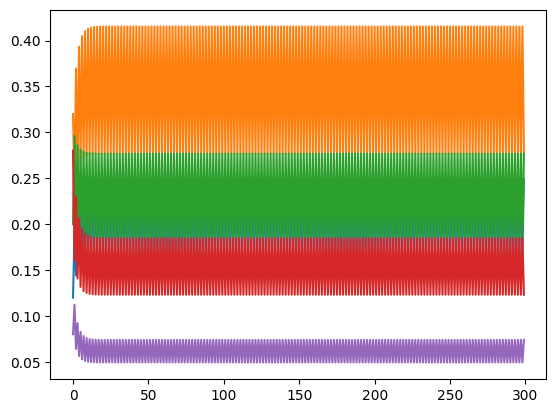

In [9]:
import numpy as np
import matplotlib.pyplot as plt
A=np.array([[0,1,0,0,0],
   [3/5,0,2/5,0,0],
   [0,3/5,0,2/5,0],
  [0,0,3/5,0,2/5],
  [0,0,0,1,0]])

def DtmcSimulation(A,p0,n):
    if not np.prod(A>=0):
        raise Exception("Elements are not non negative")
    if not np.prod(np.isclose(np.sum(A,axis=1),np.ones(A.shape[0]))):
        raise Exception("at least one row does not sum up to 1")
    if not np.isclose(np.sum(p0),1):
        raise Exception("initial probability does not sum up to 1")

    l=[]
    x0=np.random.choice(np.arange(p0.shape[0]),size=1,p=p0)
    l.append(x0)
    x=x0
    for i in range(1,n):
        p=A[x].reshape(-1)
        x=np.random.choice(np.arange(p.shape[0]),size=1,p=p)
        l.append(x)
    return l,A,p0

def steadystate_probability(A,p0,n):
    p=p0
    l=[]
    for i in range(n):
        p=p@A
        l.append(p)
    return l

n=300
p=steadystate_probability(A,p0,n)
p0=np.array([0.2,0.2,0.2,0.2,0.2])
plt.plot(np.arange(len(p)),np.array(p))

def check_convergence(A,eps):
    eigens=np.linalg.eigvals(A)
    eigens=eigens[np.abs(np.abs(eigens)-1)<eps] #extract eigenvalues of the unit circle
    equal_ones=eigens[np.logical_and(eigens>0,np.abs(np.imag(eigens))<eps)]
    if len(equal_ones)<len(eigens):
        print("no steady state distribution")
    else:
        if len(equal_ones)==1:
            print("one unique steady state distribution")
        else:
            print("infinite number of steady states")

check_convergence(A,0.0001)




There can't be trajectory convergence because there are no absorbing states.

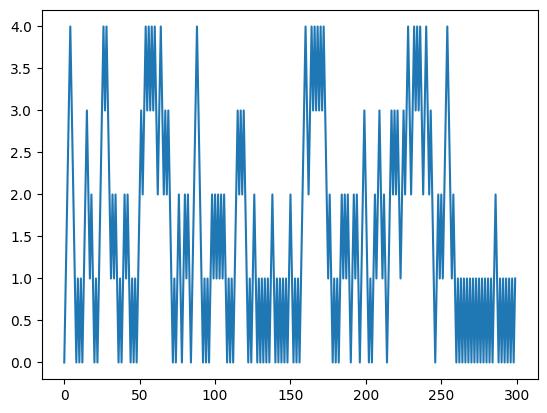

In [11]:
x,A,p0=DtmcSimulation(A,p0,n)
plt.plot(np.arange(len(x)),np.array(x))


## Exercise 2

We have that $$\pi_0=\frac{1}{1+\sum_{k=1}^{N}\prod_{i=1}^{k}\frac{b}{a}}=\frac{1}{1+\sum_{k=1}^{N}\left(\frac{b}{a}\right)^{k}}=\frac{a - b}{a - b \left(\frac{b}{a}\right)^N}$$

In [21]:
def compute_prob(a,b,N):
    pi0=(a-b)/(a-b*(b/a)**N)
    pi=(b/a)**(np.arange(N+1))
    pi=pi0*pi
    return pi


[0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


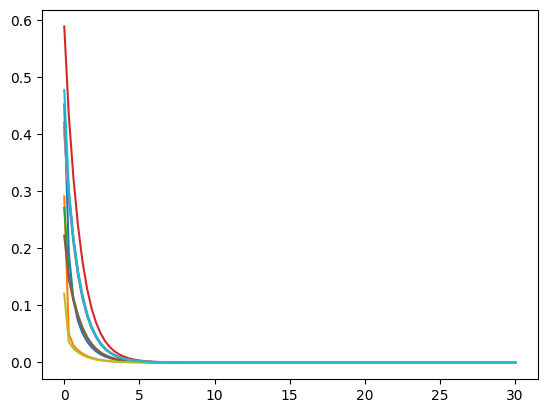

In [33]:
real_p=compute_prob(3,2,4)
print(real_p)

A=np.array([[-2,2,0,0,0],
           [3,-5,2,0,0],
           [0,3,-5,2,0],
           [0,0,3,-5,2],
           [0,0,0,3,-3]])


import scipy
def CTMCsteadystate_probability(W,p0,t):
  l=[]
  for i in t:
    p=p0@scipy.linalg.expm(W*i)
    l.append(p)
  return np.array(l)

for i in range(10):
    p0=np.random.rand(5)
    p0=p0/np.sum(p0)
    t=np.linspace(0,30,100)
    p=CTMCsteadystate_probability(A,p0,t)
    plt.plot(t, np.linalg.norm(p-real_p,axis=1))


So all the probabilies converge to the steady state distribution.

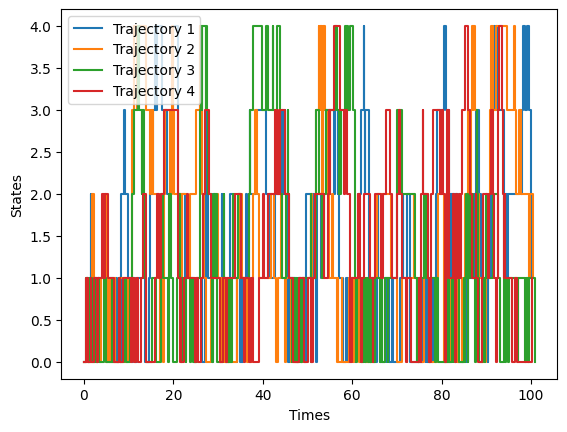

In [35]:
def CtmcSimulation(Q,x0,max_time):
  A=Q.copy()
  np.fill_diagonal(A,0)
  A=(A.T/(np.sum(A,axis=1))).T
  times=[]
  states=[]
  tot_time=0
  times.append(tot_time)
  x=x0
  states.append(x)
  while tot_time<max_time:
    t=scipy.stats.expon(scale=-1/Q[x0,x0]).rvs(size=1)[0]
    tot_time=tot_time+t
    times.append(tot_time)
    states.append(x)
    x=np.random.choice(len(A),p=A[x])
    times.append(tot_time)
    states.append(x)
  return times,states

t,x=CtmcSimulation(A,0,100)
t1,x1=CtmcSimulation(A,0,100)
t2,x2=CtmcSimulation(A,0,100)
t3,x3=CtmcSimulation(A,0,100)

plt.plot(t,x)
plt.plot(t1,x1)
plt.plot(t2,x2)
plt.plot(t3,x3)
plt.xlabel("Times")
plt.ylabel("States")
plt.legend(["Trajectory 1","Trajectory 2","Trajectory 3","Trajectory 4"])

## Exercise 3
It can be easily verified that $X_{t}$ is the jump process of $Y_{t}$.